# Deep Neural Network: On MNSIT

## Contents

1. Make soma data
2. Build model
3. Train the model

In [1]:
# import libraries

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## 1. Make some data

In [2]:
# Create dataset

train_dataset = dsets.MNIST(root='../data/', train=True, download=True, transform=transforms.ToTensor())
valid_dataset = dsets.MNIST(root='../data/', train=False, download=True, transform=transforms.ToTensor())

In [3]:
# Create dataloader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=100, shuffle=False)

## 2. Build model

In [4]:
# Define net class

class Net(nn.Module):
    
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
class Net_(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(Net_, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

## 3. Train the model

In [6]:
# Define Hipyparameters

input_dim = 28 * 28
hidden1_dim = 100
hidden2_dim = 50
output_dim = 10

learning_rate = 0.01
epochs = 30
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

In [8]:
# Create a model

model = Net(input_dim, hidden1_dim, hidden2_dim, output_dim).to(device)

# model = Net_(input_dim, hidden1_dim, output_dim).to(device)

In [9]:
# Create optimizer

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
# define the train function

def train(model, train_loader, valid_loader, criterion, optimizer, epochs=100):
    
    useful_stuff = {'training_loss': [], 'validating_accuracy': []}
    # Loop
    total_step = len(train_loader)
    for epoch in range(epochs):
        # Training
        for i, (x, y) in enumerate(train_loader):
            # move to GPU
            x = x.view(-1, 28 * 28).to(device)
            y = y.to(device)
            yhat = model(x.view(-1, 28 * 28))
            # forward pass
            optimizer.zero_grad()
            loss = criterion(yhat, y)
            loss.backward()
            # Backward and optimize
            
            optimizer.step()
            # store training loss
            useful_stuff['training_loss'].append(loss.data.item())
            # print loss
            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i, total_step, loss.item()))
        
        # Validating
        for x, y in valid_loader:
            correct = 0
            total = 0
            x = x.view(-1, 28 * 28).to(device)
            y = y.to(device)
            z = model(x)
            _, label = torch.max(z, 1)
            total += y.size(0)
            correct += (label == y).sum().item()
            accuracy = correct/total
            useful_stuff['validating_accuracy'].append(accuracy)
        print('Epoch [{}/{}], Accuracy: {:.4f}'.format(epoch+1, epochs, accuracy))
            
    return useful_stuff

In [14]:
train_results = train(model, train_loader, valid_loader, criterion, optimizer, epochs=10)

Epoch [1/10], Step [99/600], Loss: 0.3293
Epoch [1/10], Step [199/600], Loss: 0.3725
Epoch [1/10], Step [299/600], Loss: 0.3599
Epoch [1/10], Step [399/600], Loss: 0.2856
Epoch [1/10], Step [499/600], Loss: 0.2629
Epoch [1/10], Step [599/600], Loss: 0.3532
Epoch [1/10], Accuracy: 0.8900
Epoch [2/10], Step [99/600], Loss: 0.3868
Epoch [2/10], Step [199/600], Loss: 0.4228
Epoch [2/10], Step [299/600], Loss: 0.4901
Epoch [2/10], Step [399/600], Loss: 0.3261
Epoch [2/10], Step [499/600], Loss: 0.5712
Epoch [2/10], Step [599/600], Loss: 0.1489
Epoch [2/10], Accuracy: 0.8900
Epoch [3/10], Step [99/600], Loss: 0.2227
Epoch [3/10], Step [199/600], Loss: 0.2583
Epoch [3/10], Step [299/600], Loss: 0.2446
Epoch [3/10], Step [399/600], Loss: 0.2269
Epoch [3/10], Step [499/600], Loss: 0.2546
Epoch [3/10], Step [599/600], Loss: 0.3206
Epoch [3/10], Accuracy: 0.9100
Epoch [4/10], Step [99/600], Loss: 0.3620
Epoch [4/10], Step [199/600], Loss: 0.3144
Epoch [4/10], Step [299/600], Loss: 0.3250
Epoch [4

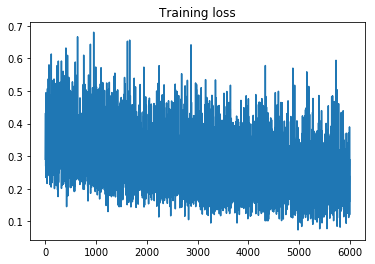

In [15]:
# plot the loss

plt.plot(train_results['training_loss'])
plt.title('Training loss')
plt.show()

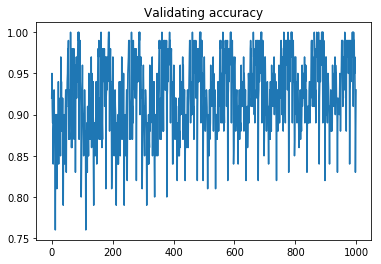

In [16]:
# plot the accuracy

plt.plot(train_results['validating_accuracy'])
plt.title('Validating accuracy')
plt.show()